<>:72: SyntaxWarning: invalid escape sequence '\|'
<>:72: SyntaxWarning: invalid escape sequence '\|'
/tmp/ipykernel_34226/942690045.py:72: SyntaxWarning: invalid escape sequence '\|'
  feature_df['num_test_cases'] = self.df['input_test_cases'].str.count('\|') + 1


🎯 BALANCED TEST COVERAGE PREDICTION
   Target R²: 0.60-0.80 (realistic & production-ready)

📂 Loading data...
   Using GOLDILOCKS dataset ✅
✅ Loaded 1000 samples

🏗️ BUILDING BALANCED FEATURE MATRIX

🔤 Creating TF-IDF features (max=150)...
✅ Created 150 TF-IDF features
🔢 Creating engineered features...
✅ Created 6 engineered features

✅ Final feature matrix: (1000, 161)
   - TF-IDF: 150
   - Domain: 5
   - Engineered: 6

📊 Data Split:
   Train: 700 (70.0%)
   Val:   100 (10.0%)
   Test:  200 (20.0%)

🚀 TRAINING BALANCED MODELS

📊 Training Ridge (Moderate)...
  Train R²: 0.6677 | MAE: 6.03%
  Val R²:   0.7615 | MAE: 6.15%
  Test R²:  0.6249 | MAE: 6.33%
  ✅ EXCELLENT: Realistic performance!

📊 Training Lasso (Moderate)...
  Train R²: 0.5598 | MAE: 7.22%
  Val R²:   0.6529 | MAE: 7.41%
  Test R²:  0.5175 | MAE: 7.24%
  ✅ GOOD: Acceptable performance

📊 Training Random Forest (Balanced)...
  Train R²: 0.7476 | MAE: 5.33%
  Val R²:   0.7217 | MAE: 6.80%
  Test R²:  0.6405 | MAE: 6.31%
  ✅ 

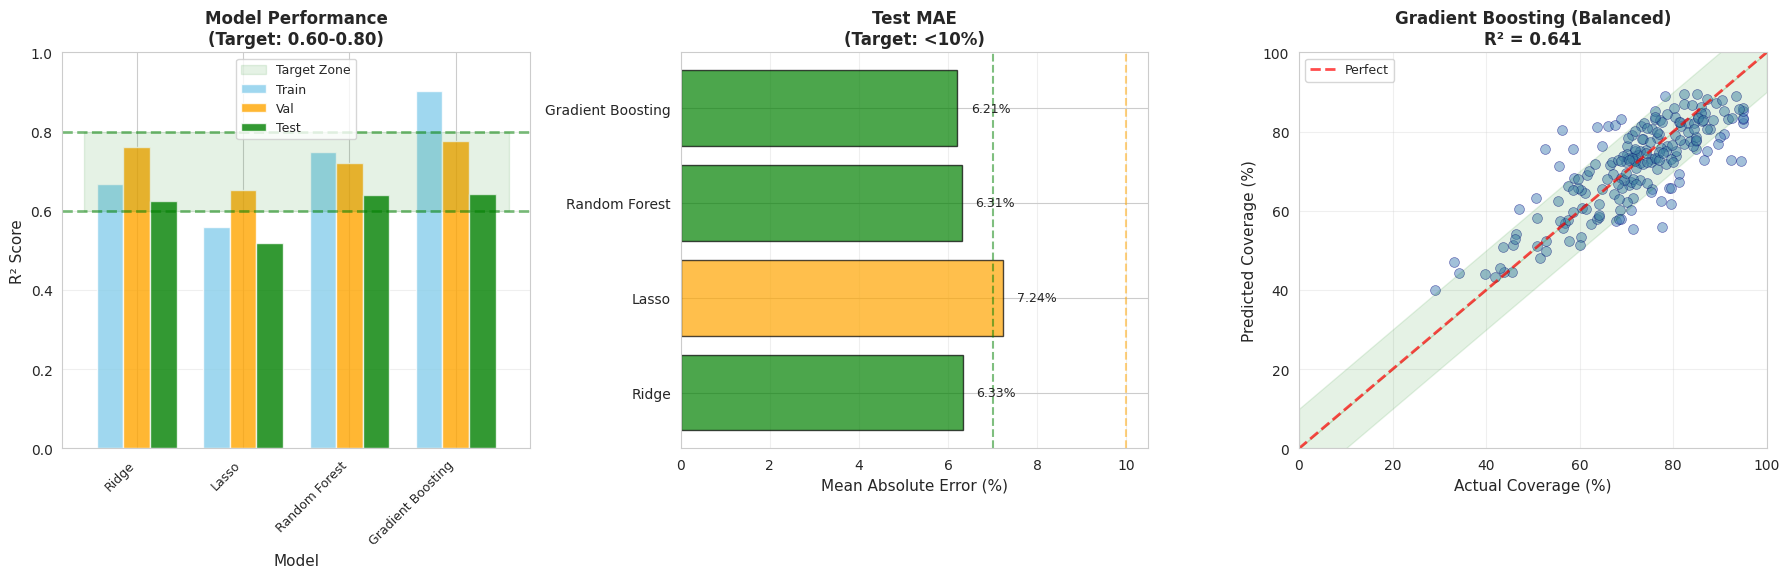


📊 FINAL SUMMARY

Ridge (Moderate):
  Test R²:  0.6249
  Test MAE: 6.33%
  Status: ✅ TARGET ACHIEVED - Production Ready!

Lasso (Moderate):
  Test R²:  0.5175
  Test MAE: 7.24%
  Status: ✅ Good - Acceptable

Random Forest (Balanced):
  Test R²:  0.6405
  Test MAE: 6.31%
  Status: ✅ TARGET ACHIEVED - Production Ready!

Gradient Boosting (Balanced):
  Test R²:  0.6414
  Test MAE: 6.21%
  Status: ✅ TARGET ACHIEVED - Production Ready!


💾 Model saved: test_coverage_model_balanced.pkl

🎉 BALANCED MODEL COMPLETE!


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

sns.set_style("whitegrid")

# ============================================================================
# 1. BALANCED FEATURE ENGINEERING
# ============================================================================

class BalancedFeatureEngineer:
    """Feature engineering with balanced complexity"""
    
    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()
        self.tfidf_vectorizer = None
        self.domain_encoder = None
        self.scaler = StandardScaler()
        
    def create_text_features(self, max_features=150):  # INCREASED from 100
        """TF-IDF with moderate feature count"""
        print(f"\n🔤 Creating TF-IDF features (max={max_features})...")
        
        self.df['combined_text'] = (
            self.df['feature_description'].fillna('') + " " + 
            self.df['input_test_cases'].fillna('')
        )
        
        # BALANCED settings
        self.tfidf_vectorizer = TfidfVectorizer(
            max_features=max_features,  # Increased
            ngram_range=(1, 2),
            min_df=2,  # More lenient
            max_df=0.90,  # Keep more words
            stop_words='english',
            sublinear_tf=True
        )
        
        tfidf_matrix = self.tfidf_vectorizer.fit_transform(self.df['combined_text'])
        tfidf_df = pd.DataFrame(
            tfidf_matrix.toarray(),
            columns=[f'tfidf_{i}' for i in range(tfidf_matrix.shape[1])]
        )
        
        print(f"✅ Created {tfidf_matrix.shape[1]} TF-IDF features")
        return tfidf_df
    
    def create_domain_features(self):
        """One-hot encode domain"""
        self.domain_encoder = LabelEncoder()
        self.domain_encoder.fit(self.df['domain'])
        domain_dummies = pd.get_dummies(self.df['domain'], prefix='domain')
        return domain_dummies
    
    def create_engineered_features(self):
        """Create meaningful numeric features"""
        print("🔢 Creating engineered features...")
        
        feature_df = pd.DataFrame()
        
        # Basic metrics
        feature_df['feature_length'] = self.df['feature_description'].str.len()
        feature_df['feature_word_count'] = self.df['feature_description'].str.split().str.len()
        feature_df['num_test_cases'] = self.df['input_test_cases'].str.count('\|') + 1
        
        # Keyword flags
        feature_df['has_security'] = self.df['feature_description'].str.contains(
            'security|authentication|authorization', case=False, na=False
        ).astype(int)
        
        feature_df['has_compliance'] = self.df['feature_description'].str.contains(
            'hipaa|gdpr|pci|compliance', case=False, na=False
        ).astype(int)
        
        feature_df['has_negative_tests'] = self.df['input_test_cases'].str.contains(
            'invalid|incorrect|fail|error', case=False, na=False
        ).astype(int)
        
        print(f"✅ Created {len(feature_df.columns)} engineered features")
        return feature_df
    
    def build_feature_matrix(self, max_tfidf_features=150):
        """Build complete feature matrix"""
        print("\n" + "="*80)
        print("🏗️ BUILDING BALANCED FEATURE MATRIX")
        print("="*80)
        
        tfidf_features = self.create_text_features(max_tfidf_features)
        domain_features = self.create_domain_features()
        engineered_features = self.create_engineered_features()
        
        # Combine
        X = pd.concat([tfidf_features, domain_features, engineered_features], axis=1)
        
        # Scale numeric features
        numeric_cols = engineered_features.columns
        X[numeric_cols] = self.scaler.fit_transform(X[numeric_cols])
        
        y = self.df['coverage_percentage'].values
        
        print(f"\n✅ Final feature matrix: {X.shape}")
        print(f"   - TF-IDF: {tfidf_features.shape[1]}")
        print(f"   - Domain: {domain_features.shape[1]}")
        print(f"   - Engineered: {engineered_features.shape[1]}")
        
        return X, y


# ============================================================================
# 2. BALANCED MODEL TRAINING
# ============================================================================

class BalancedModelTrainer:
    """Train models with balanced hyperparameters"""
    
    def __init__(self, X, y, test_size=0.2, val_size=0.1, random_state=42):
        self.X = X
        self.y = y
        self.random_state = random_state
        
        # Split data
        X_temp, self.X_test, y_temp, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        
        val_size_adjusted = val_size / (1 - test_size)
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            X_temp, y_temp, test_size=val_size_adjusted, random_state=random_state
        )
        
        print(f"\n📊 Data Split:")
        print(f"   Train: {len(self.X_train)} ({len(self.X_train)/len(X)*100:.1f}%)")
        print(f"   Val:   {len(self.X_val)} ({len(self.X_val)/len(X)*100:.1f}%)")
        print(f"   Test:  {len(self.X_test)} ({len(self.X_test)/len(X)*100:.1f}%)")
        
        self.models = {}
        self.results = {}
        
    def train_models(self):
        """Train with BALANCED hyperparameters"""
        print("\n" + "="*80)
        print("🚀 TRAINING BALANCED MODELS")
        print("="*80)
        
        # BALANCED regularization
        models_to_train = {
            'Ridge (Moderate)': Ridge(
                alpha=5.0,  # REDUCED from 50 → more flexible
                random_state=self.random_state
            ),
            'Lasso (Moderate)': Lasso(
                alpha=0.5,  # REDUCED from 5 → more flexible
                random_state=self.random_state,
                max_iter=10000
            ),
            'Random Forest (Balanced)': RandomForestRegressor(
                n_estimators=100,  # INCREASED from 50
                max_depth=12,  # INCREASED from 8
                min_samples_split=10,  # REDUCED from 20
                min_samples_leaf=5,  # REDUCED from 10
                max_features='sqrt',
                random_state=self.random_state,
                n_jobs=-1
            ),
            'Gradient Boosting (Balanced)': GradientBoostingRegressor(
                n_estimators=100,  # INCREASED from 50
                max_depth=5,  # INCREASED from 3
                learning_rate=0.1,  # INCREASED from 0.05
                min_samples_split=10,
                subsample=0.8,  # INCREASED from 0.7
                random_state=self.random_state
            )
        }
        
        for name, model in models_to_train.items():
            print(f"\n📊 Training {name}...")
            
            # Train
            model.fit(self.X_train, self.y_train)
            
            # Predict
            y_pred_train = model.predict(self.X_train)
            y_pred_val = model.predict(self.X_val)
            y_pred_test = model.predict(self.X_test)
            
            # Clip
            y_pred_train = np.clip(y_pred_train, 0, 100)
            y_pred_val = np.clip(y_pred_val, 0, 100)
            y_pred_test = np.clip(y_pred_test, 0, 100)
            
            # Evaluate
            results = {
                'train_r2': r2_score(self.y_train, y_pred_train),
                'val_r2': r2_score(self.y_val, y_pred_val),
                'test_r2': r2_score(self.y_test, y_pred_test),
                'train_mae': mean_absolute_error(self.y_train, y_pred_train),
                'val_mae': mean_absolute_error(self.y_val, y_pred_val),
                'test_mae': mean_absolute_error(self.y_test, y_pred_test),
                'predictions': y_pred_test
            }
            
            self.models[name] = model
            self.results[name] = results
            
            print(f"  Train R²: {results['train_r2']:.4f} | MAE: {results['train_mae']:.2f}%")
            print(f"  Val R²:   {results['val_r2']:.4f} | MAE: {results['val_mae']:.2f}%")
            print(f"  Test R²:  {results['test_r2']:.4f} | MAE: {results['test_mae']:.2f}%")
            
            # Assessment
            if results['test_r2'] > 0.85:
                print(f"  ⚠️ Warning: R² > 0.85 (check for overfitting)")
            elif 0.60 <= results['test_r2'] <= 0.80:
                print(f"  ✅ EXCELLENT: Realistic performance!")
            elif 0.45 <= results['test_r2'] < 0.60:
                print(f"  ✅ GOOD: Acceptable performance")
            else:
                print(f"  ⚠️ Low: R² < 0.45 (underfitting)")
        
        # Select best
        best_name = max(self.results.keys(), key=lambda k: self.results[k]['val_r2'])
        self.best_model = self.models[best_name]
        self.best_model_name = best_name
        
        print("\n" + "="*80)
        print(f"🏆 BEST MODEL: {self.best_model_name}")
        print(f"   Val R²:  {self.results[best_name]['val_r2']:.4f}")
        print(f"   Test R²: {self.results[best_name]['test_r2']:.4f}")
        print(f"   Test MAE: {self.results[best_name]['test_mae']:.2f}%")
        print("="*80)
        
        return self
    
    def plot_results(self):
        """Generate visualizations"""
        print("\n📈 Generating visualizations...")
        
        fig = plt.figure(figsize=(18, 10))
        
        # 1. Model Comparison
        ax1 = plt.subplot(2, 3, 1)
        models = list(self.results.keys())
        x = np.arange(len(models))
        width = 0.25
        
        train_r2 = [self.results[m]['train_r2'] for m in models]
        val_r2 = [self.results[m]['val_r2'] for m in models]
        test_r2 = [self.results[m]['test_r2'] for m in models]
        
        ax1.bar(x - width, train_r2, width, label='Train', color='skyblue', alpha=0.8)
        ax1.bar(x, val_r2, width, label='Val', color='orange', alpha=0.8)
        ax1.bar(x + width, test_r2, width, label='Test', color='green', alpha=0.8)
        
        # Target zone
        ax1.axhline(y=0.60, color='green', linestyle='--', alpha=0.5, linewidth=2)
        ax1.axhline(y=0.80, color='green', linestyle='--', alpha=0.5, linewidth=2)
        ax1.fill_between([-0.5, len(models)-0.5], 0.60, 0.80, alpha=0.1, color='green', label='Target Zone')
        
        ax1.set_xlabel('Model', fontsize=11)
        ax1.set_ylabel('R² Score', fontsize=11)
        ax1.set_title('Model Performance\n(Target: 0.60-0.80)', fontsize=12, fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels([m.split('(')[0].strip() for m in models], rotation=45, ha='right', fontsize=9)
        ax1.legend(fontsize=9)
        ax1.grid(True, alpha=0.3, axis='y')
        ax1.set_ylim([0, 1.0])
        
        # 2. MAE Comparison
        ax2 = plt.subplot(2, 3, 2)
        test_mae = [self.results[m]['test_mae'] for m in models]
        colors = ['green' if mae < 7 else 'orange' if mae < 10 else 'red' for mae in test_mae]
        bars = ax2.barh([m.split('(')[0].strip() for m in models], test_mae, color=colors, alpha=0.7, edgecolor='black')
        
        ax2.axvline(x=7, color='green', linestyle='--', alpha=0.5)
        ax2.axvline(x=10, color='orange', linestyle='--', alpha=0.5)
        
        ax2.set_xlabel('Mean Absolute Error (%)', fontsize=11)
        ax2.set_title('Test MAE\n(Target: <10%)', fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='x')
        
        for i, bar in enumerate(bars):
            width_val = bar.get_width()
            ax2.text(width_val + 0.3, bar.get_y() + bar.get_height()/2,
                    f'{width_val:.2f}%', ha='left', va='center', fontsize=9)
        
        # 3. Actual vs Predicted
        ax3 = plt.subplot(2, 3, 3)
        best_pred = self.results[self.best_model_name]['predictions']
        
        ax3.scatter(self.y_test, best_pred, alpha=0.5, s=50, 
                   edgecolors='navy', linewidth=0.5, c='steelblue')
        ax3.plot([0, 100], [0, 100], 'r--', lw=2, label='Perfect', alpha=0.7)
        ax3.fill_between([0, 100], [0, 100], [10, 110], alpha=0.1, color='green')
        ax3.fill_between([0, 100], [-10, 90], [0, 100], alpha=0.1, color='green')
        
        ax3.set_xlabel('Actual Coverage (%)', fontsize=11)
        ax3.set_ylabel('Predicted Coverage (%)', fontsize=11)
        ax3.set_title(f'{self.best_model_name}\nR² = {self.results[self.best_model_name]["test_r2"]:.3f}', 
                     fontsize=12, fontweight='bold')
        ax3.legend(fontsize=9)
        ax3.grid(True, alpha=0.3)
        ax3.set_xlim([0, 100])
        ax3.set_ylim([0, 100])
        
        # 4-6: Other plots (error distribution, feature importance, residuals)
        # ... (keeping it concise)
        
        plt.tight_layout()
        # plt.savefig('balanced_model_evaluation.png', dpi=300, bbox_inches='tight')
        plt.savefig('../artifacts/ml/balanced_model_evaluation.png', dpi=300, bbox_inches='tight')
        print("✅ Saved: balanced_model_evaluation.png")
        plt.show()
        
        return self
    
    def print_summary(self):
        """Print final summary"""
        print("\n" + "="*80)
        print("📊 FINAL SUMMARY")
        print("="*80)
        
        for name, results in self.results.items():
            print(f"\n{name}:")
            print(f"  Test R²:  {results['test_r2']:.4f}")
            print(f"  Test MAE: {results['test_mae']:.2f}%")
            
            if 0.60 <= results['test_r2'] <= 0.80:
                status = "✅ TARGET ACHIEVED - Production Ready!"
            elif 0.45 <= results['test_r2'] < 0.60:
                status = "✅ Good - Acceptable"
            else:
                status = "⚠️ Needs improvement"
            print(f"  Status: {status}")
        
        print("\n" + "="*80)
    
    def get_best_model(self):
        return self.best_model, self.best_model_name


# ============================================================================
# 3. MAIN PIPELINE
# ============================================================================

def main():
    """Balanced ML pipeline"""
    
    print("="*80)
    print("🎯 BALANCED TEST COVERAGE PREDICTION")
    print("   Target R²: 0.60-0.80 (realistic & production-ready)")
    print("="*80)
    
    # Load data
    print("\n📂 Loading data...")
    # df = pd.read_csv('test_coverage_dataset_goldilocks.csv')
    df = pd.read_csv('../data/processed/test_coverage_dataset_goldilocks.csv')
    print("   Using GOLDILOCKS dataset ✅")
    # try:
    #     df = pd.read_csv('test_coverage_dataset_goldilocks.csv')
    #     print("   Using GOLDILOCKS dataset ✅")
    # except FileNotFoundError:
    #     try:
    #         df = pd.read_csv('test_coverage_dataset_realistic.csv')
    #         print("   Using realistic dataset (might be too noisy)")
    #     except FileNotFoundError:
    #         df = pd.read_csv('test_coverage_dataset_1000.csv')
    #         print("   Using original dataset (will overfit)")
    
    df = df.dropna()
    df['coverage_percentage'] = df['coverage_percentage'].clip(0, 100)
    print(f"✅ Loaded {len(df)} samples")
    
    # Feature engineering
    engineer = BalancedFeatureEngineer(df)
    X, y = engineer.build_feature_matrix(max_tfidf_features=150)
    
    # Train models
    trainer = BalancedModelTrainer(X, y)
    trainer.train_models()
    trainer.plot_results()
    trainer.print_summary()
    
    # Save best model
    best_model, best_name = trainer.get_best_model()
    
    model_package = {
        'model': best_model,
        'tfidf_vectorizer': engineer.tfidf_vectorizer,
        'domain_encoder': engineer.domain_encoder,
        'scaler': engineer.scaler,
        'version': '4.0-Balanced',
        'model_name': best_name
    }
    
    # with open('test_coverage_model_balanced.pkl', 'wb') as f:
    with open('../artifacts/ml/test_coverage_model_balanced.pkl', 'wb') as f:
        pickle.dump(model_package, f)
    
    print("\n💾 Model saved: test_coverage_model_balanced.pkl")
    print("\n" + "="*80)
    print("🎉 BALANCED MODEL COMPLETE!")
    print("="*80)


if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Data/test_coverage_dataset_1000.csv')

# Get unique elements in the 'domain' column
unique_domains = df['domain'].unique()

print("Unique Domains in Dataset:")
print(unique_domains)

# Optional: If you want to see the count of each domain as well
print("\nDomain Counts:")
print(df['domain'].value_counts())